<a href="https://colab.research.google.com/github/haydenkirkeide/Data-Mining-Final-Project/blob/main/LinRegLogRegForestMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from google.colab import drive
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Import data

dfHumanPrelim = pd.read_excel('/content/drive/My Drive/OPT_ANON_Preliminary_Survey.xlsx')

dfHumanTrip = pd.read_excel('/content/drive/My Drive/OPT_ANON_Trip_by_Trip.xlsx')

dfSynthPrelim = pd.read_excel('/content/drive/My Drive/SYNTH_Preliminary_Survey.xlsx')

dfSynthTrip = pd.read_excel('/content/drive/My Drive/OPT_SYNTH_Trip_by_Trip.xlsx')

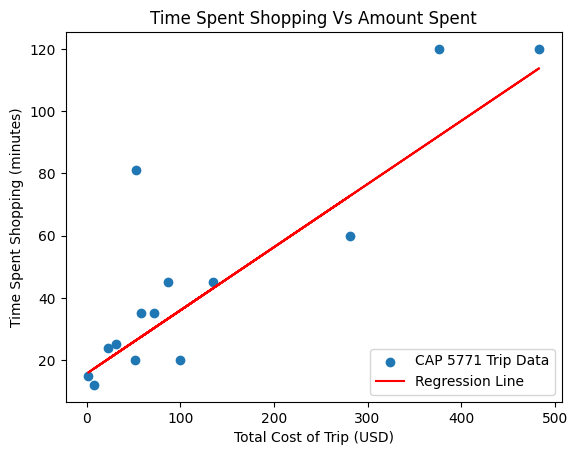

Slope: [0.21341018]
Intercept: [20.09818627]
R-value (correlation coefficient): [0.87291251]
P-value: [4.60042326e-05]
Standard error: [0.03443213]


In [5]:
# Linear Regression Human data - Time Vs Cost

# Split data and reshape
xtrain, xtest, ytrain, ytest = train_test_split(dfHumanTrip['Cost'].to_numpy().reshape(-1, 1),dfHumanTrip['Time spent'].to_numpy().reshape(-1, 1),test_size=0.3)

# Create the model
ModelLinReg = LinearRegression()
ModelLinReg.fit(xtrain,ytrain)

# Plot the regression
plt.scatter(dfHumanTrip['Cost'].to_numpy().reshape(-1, 1),dfHumanTrip['Time spent'].to_numpy().reshape(-1, 1), label='CAP 5771 Trip Data')
plt.plot(dfHumanTrip['Cost'].to_numpy().reshape(-1, 1), ModelLinReg.predict(dfHumanTrip['Cost'].to_numpy().reshape(-1, 1)), color='red', label='Regression Line')
plt.xlabel('Total Cost of Trip (USD)')
plt.ylabel('Time Spent Shopping (minutes)')
plt.title("Time Spent Shopping Vs Amount Spent")
plt.legend(loc = 'lower right')
plt.show()

# Display statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(dfHumanTrip['Cost'].to_numpy().reshape(-1, 1), dfHumanTrip['Time spent'].to_numpy().reshape(-1, 1))
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value (correlation coefficient): {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")


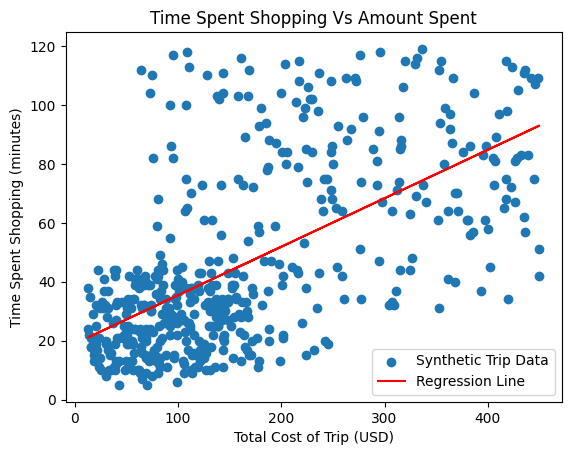

Slope: [0.16509734]
Intercept: [19.07143373]
R-value: [0.61405076]
P-value: [3.8095749e-53]
Standard error: [0.00950922]


In [6]:
# Linear Regression Synthetic data

# Split data and reshape
xtrain, xtest, ytrain, ytest = train_test_split(dfSynthTrip['Total Cost USD'].to_numpy().reshape(-1, 1),dfSynthTrip['Time Spent Min'].to_numpy().reshape(-1, 1),test_size=0.3)

# Create the model
ModelLinReg = LinearRegression()
ModelLinReg.fit(xtrain,ytrain)

# Plot the regression
plt.scatter(dfSynthTrip['Total Cost USD'].to_numpy().reshape(-1, 1),dfSynthTrip['Time Spent Min'].to_numpy().reshape(-1, 1), label='Synthetic Trip Data')
plt.plot(dfSynthTrip['Total Cost USD'].to_numpy().reshape(-1, 1), ModelLinReg.predict(dfSynthTrip['Total Cost USD'].to_numpy().reshape(-1, 1)), color='red', label='Regression Line')
plt.xlabel('Total Cost of Trip (USD)')
plt.ylabel('Time Spent Shopping (minutes)')
plt.title("Time Spent Shopping Vs Amount Spent")
plt.legend()
plt.show()

# Display Statistics
slope, intercept, r_value, p_value, std_err = stats.linregress(dfSynthTrip['Total Cost USD'].to_numpy().reshape(-1, 1), dfSynthTrip['Time Spent Min'].to_numpy().reshape(-1, 1))
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value}")
print(f"P-value: {p_value}")
print(f"Standard error: {std_err}")



In [7]:
# dataset adjustments to human data for logistic regression
dfHumanPrelimLog = dfHumanPrelim.copy()

dfHumanPrelimLog = dfHumanPrelimLog.drop(columns = ['ID','age','membership_start'])
dfHumanPrelimLog = pd.get_dummies(dfHumanPrelimLog, columns=['membership', 'employed'])
dfHumanPrelimLog = dfHumanPrelimLog.drop(columns = ['membership_no','avg_cost'])

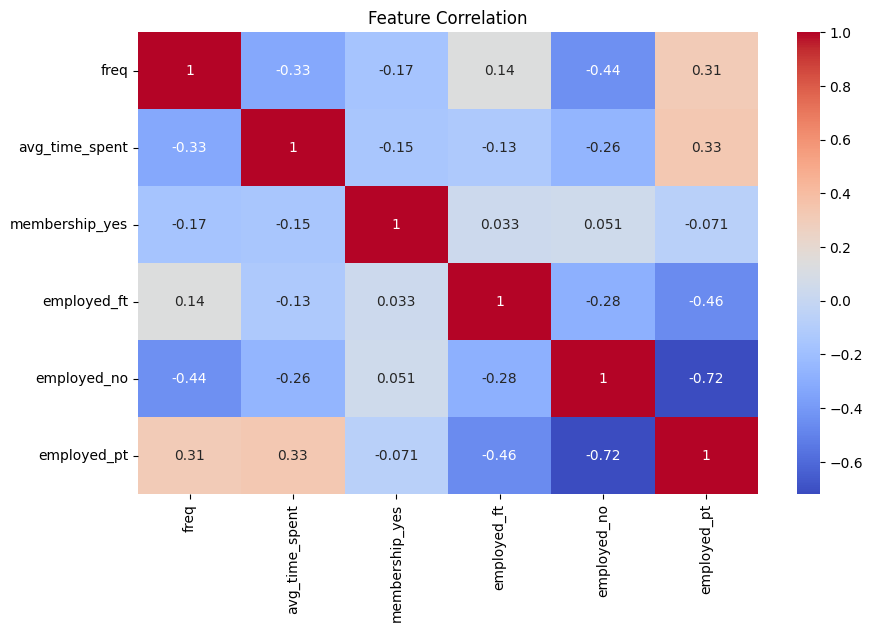

Accuracy for iteration 0: 0.2857142857142857
Accuracy for iteration 1: 0.42857142857142855
Accuracy for iteration 2: 0.42857142857142855
Accuracy for iteration 3: 0.14285714285714285
Accuracy for iteration 4: 0.2857142857142857
Accuracy for iteration 5: 0.5714285714285714
Accuracy for iteration 6: 0.42857142857142855
Accuracy for iteration 7: 0.2857142857142857
Accuracy for iteration 8: 0.42857142857142855
Accuracy for iteration 9: 0.5714285714285714
Mean accuracy: 0.3857142857142857
          Feature  Coefficient
1  avg_time_spent     0.072399
4     employed_pt     0.050370
2     employed_ft     0.000000
3     employed_no    -0.050370
0            freq    -0.275618


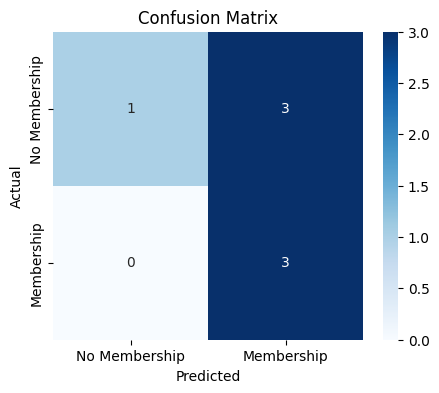

              precision    recall  f1-score   support

       False       1.00      0.25      0.40         4
        True       0.50      1.00      0.67         3

    accuracy                           0.57         7
   macro avg       0.75      0.62      0.53         7
weighted avg       0.79      0.57      0.51         7



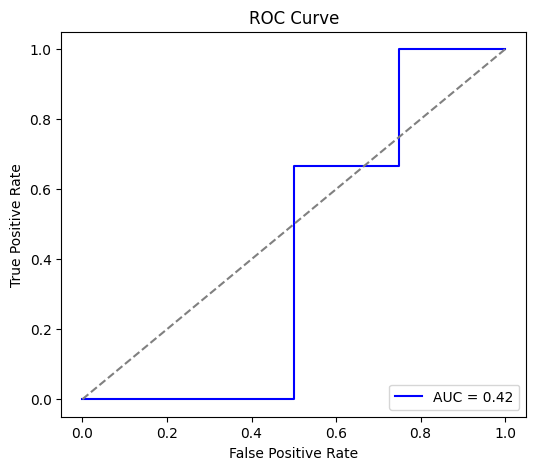

In [16]:
# Logistic Regression for Human Data

# Plot the correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(dfHumanPrelimLog.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

accuracies = []

for i in range(10):

  # Define features and independent variable
  X = dfHumanPrelimLog.drop(columns=['membership_yes'])
  y = dfHumanPrelimLog['membership_yes']

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

  # Apply scaler to data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  dfHumanPrelimLog[['freq', 'avg_time_spent']] = scaler.fit_transform(dfHumanPrelimLog[['freq','avg_time_spent']])

  # Fit the model
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train, y_train)

  # Predict test set
  y_pred = model.predict(X_test)

  # Get probability scores
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  # Get feature importance
  coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
  coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for iteration {i}: {accuracy}")

  accuracies.append(accuracy)

print(f"Mean accuracy: {np.mean(accuracies)}")

print(coefficients)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Membership", "Membership"], yticklabels=["No Membership", "Membership"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

# Get probability scores for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [18]:
# Data adjustments to synthetic data for logistic regression
dfSynthPrelimLog = dfSynthPrelim.copy()

dfSynthPrelimLog['Age_Group'] = dfSynthPrelimLog['Age Group'].replace({'18-20': 0, '21-23': 1, '24-26': 2, '27-30': 3})
dfSynthPrelimLog['Employment Status'] = dfSynthPrelimLog['Student Status'].replace({'Part-time student': 'Part-time', 'Student only': 'Unemployed', 'Full-time student (employed)': 'Full-time'})
dfSynthPrelimLog = dfSynthPrelimLog.drop(columns = ['Respondent ID','Year Membership Started','Alternative Stores','Comment Summary','Age Group','Student Status'])
dfSynthPrelimLog['Visit_Frequency'] = dfSynthPrelimLog['Visit Frequency'].replace({'Rarely': 0, 'Quarterly': 1, 'Monthly': 2, 'Bi-weekly': 3, 'Weekly': 4})
dfSynthPrelimLog = dfSynthPrelimLog.drop(columns = ['Visit Frequency'])
dfSynthPrelimLog = pd.get_dummies(dfSynthPrelimLog, columns=['Costco Member', 'Employment Status'])
dfSynthPrelimLog = dfSynthPrelimLog.drop(columns = ['Costco Member_No'])

/tmp/ipython-input-1841002059.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSynthPrelimLog['Age_Group'] = dfSynthPrelimLog['Age Group'].replace({'18-20': 0, '21-23': 1, '24-26': 2, '27-30': 3})
/tmp/ipython-input-1841002059.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSynthPrelimLog['Visit_Frequency'] = dfSynthPrelimLog['Visit Frequency'].replace({'Rarely': 0, 'Quarterly': 1, 'Monthly': 2, 'Bi-weekly': 3, 'Weekly': 4})


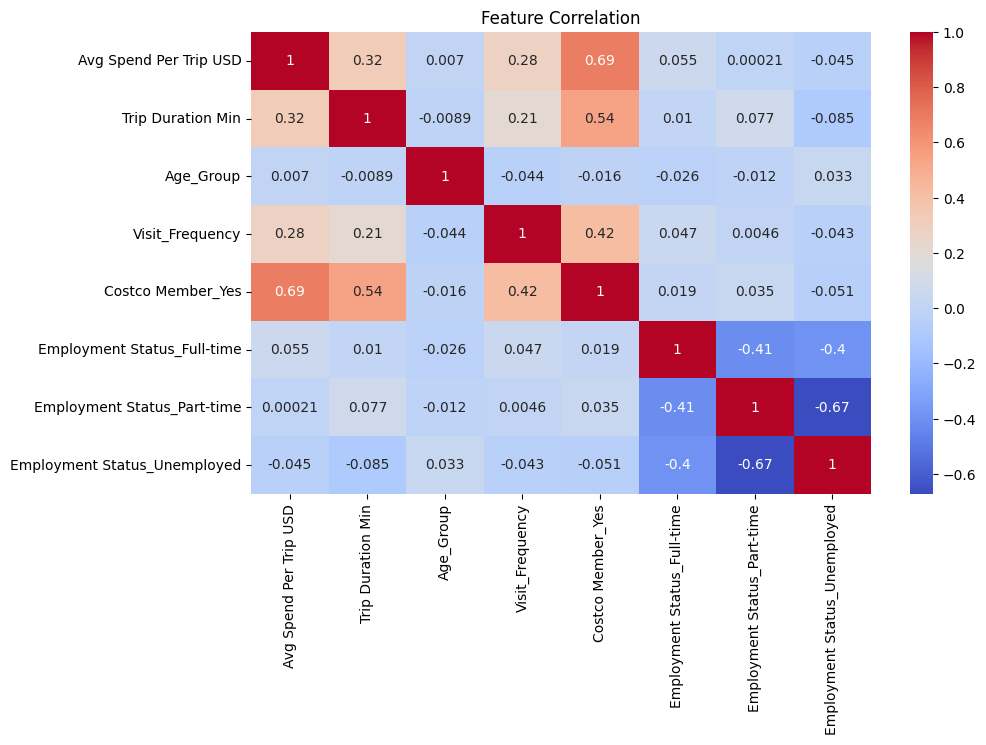

Accuracy for iteration 0: 0.92
Accuracy for iteration 1: 0.9
Accuracy for iteration 2: 0.82
Accuracy for iteration 3: 0.86
Accuracy for iteration 4: 0.96
Accuracy for iteration 5: 0.82
Accuracy for iteration 6: 0.88
Accuracy for iteration 7: 0.86
Accuracy for iteration 8: 0.9
Accuracy for iteration 9: 0.9
Mean accuracy: 0.882
                        Feature  Coefficient
0        Avg Spend Per Trip USD     2.298643
1             Trip Duration Min     1.492758
3               Visit_Frequency     0.934705
2                     Age_Group     0.253438
6  Employment Status_Unemployed     0.071582
4   Employment Status_Full-time     0.018263
5   Employment Status_Part-time    -0.084097


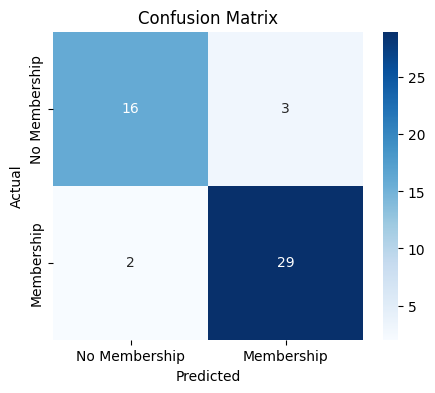

              precision    recall  f1-score   support

       False       0.89      0.84      0.86        19
        True       0.91      0.94      0.92        31

    accuracy                           0.90        50
   macro avg       0.90      0.89      0.89        50
weighted avg       0.90      0.90      0.90        50



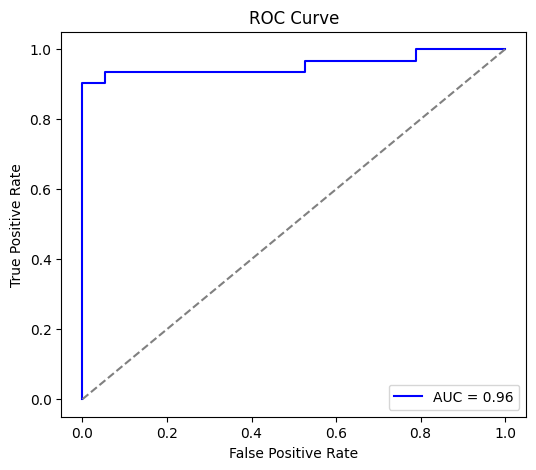

In [19]:
# Logistic Regression for Synthetic data

# Plot correlation matrix
plt.figure(figsize=(10,6))
sns.heatmap(dfSynthPrelimLog.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

accuracies = []

for i in range(10):
  # Define features and independent variable
  X = dfSynthPrelimLog.drop(columns=['Costco Member_Yes'])
  y = dfSynthPrelimLog['Costco Member_Yes']

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  # Apply scaler to data
  scaler = StandardScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  dfSynthPrelimLog[['Avg Spend Per Trip USD', 'Trip Duration Min']] = scaler.fit_transform(dfSynthPrelimLog[['Avg Spend Per Trip USD', 'Trip Duration Min']])

  # Create the model
  model = LogisticRegression(max_iter=1000)
  model.fit(X_train, y_train)

  # Predict the test set
  y_pred = model.predict(X_test)

  # Get probability scores
  y_pred_proba = model.predict_proba(X_test)[:, 1]

  # Get feature importance
  coefficients = pd.DataFrame({"Feature": X.columns, "Coefficient": model.coef_[0]})
  coefficients = coefficients.sort_values(by="Coefficient", ascending=False)

  # Calculate accuracy
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for iteration {i}: {accuracy}")

  accuracies.append(accuracy)

print(f"Mean accuracy: {np.mean(accuracies)}")

print(coefficients)

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Membership", "Membership"], yticklabels=["No Membership", "Membership"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

# Get probability scores for ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color="blue", label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")  # Random chance line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()


In [20]:
# Data adjustments to human data for perceptron
dfHumanPrelimPer = dfHumanPrelim.copy()

dfHumanPrelimPer = dfHumanPrelimPer.drop(columns = ['ID','age','membership_start'])
dfHumanPrelimPer['newemployed'] = dfHumanPrelimPer['employed'].replace({'pt': 1, 'no': 0, 'ft': 2})
dfHumanPrelimPer['newmembership'] = dfHumanPrelimPer['membership'].replace({'yes': 1, 'no': 0})


/tmp/ipython-input-4152656890.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfHumanPrelimPer['newemployed'] = dfHumanPrelimPer['employed'].replace({'pt': 1, 'no': 0, 'ft': 2})
/tmp/ipython-input-4152656890.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfHumanPrelimPer['newmembership'] = dfHumanPrelimPer['membership'].replace({'yes': 1, 'no': 0})


In [21]:
# Perceptron for Human Data

# Define attributes and test variable
X_array = np.array([dfHumanPrelimPer['newemployed'].to_numpy(),dfHumanPrelimPer['freq'].to_numpy(),
                    dfHumanPrelimPer['avg_cost'].to_numpy(),dfHumanPrelimPer['avg_time_spent'].to_numpy()]).T
Y_array = np.array([dfHumanPrelimPer['newmembership'].to_numpy()]).T

accuracies = []

for i in range(10):
  # Split the data
  X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, X4_train, X4_test, Y_train, Y_test = train_test_split(X_array[:,0],X_array[:,1],X_array[:,2],X_array[:,3], Y_array, test_size=0.4)

  X_trainarray = np.array([X1_train, X2_train, X3_train, X4_train]).T
  X_testarray = np.array([X1_test, X2_test, X3_test, X4_test]).T

  # Create the perceptron
  clf = MLPClassifier(hidden_layer_sizes=(4, 2),max_iter=1000)

  clf.fit(X_trainarray, Y_train.ravel())

  # Predict the test set
  Y_pred = clf.predict(X_testarray)

  # Output statistics
  accuracy = accuracy_score(Y_test, Y_pred)
  print(f"Accuracy for iteration {i}: {accuracy}")

  accuracies.append(accuracy)

print(f"Mean accuracy: {np.mean(accuracies)}")

class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for iteration 0: 0.3333333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for iteration 1: 0.16666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for iteration 2: 0.3333333333333333


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for iteration 3: 0.3333333333333333
Accuracy for iteration 4: 0.5
Accuracy for iteration 5: 0.6666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for iteration 6: 0.16666666666666666


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy for iteration 7: 0.16666666666666666
Accuracy for iteration 8: 0.3333333333333333
Accuracy for iteration 9: 0.6666666666666666
Mean accuracy: 0.3666666666666666
Classification Report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       0.00      0.00      0.00         2

    accuracy                           0.67         6
   macro avg       0.33      0.50      0.40         6
weighted avg       0.44      0.67      0.53         6



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# Data adjustments to synthetic data for perceptron
dfSynthPrelimPer = dfSynthPrelim.copy()

dfSynthPrelimPer['Age_Group'] = dfSynthPrelimPer['Age Group'].replace({'18-20': 0, '21-23': 1, '24-26': 2, '27-30': 3})
dfSynthPrelimPer['Employment Status'] = dfSynthPrelimPer['Student Status'].replace({'Part-time student': 'Part-time', 'Student only': 'Unemployed', 'Full-time student (employed)': 'Full-time'})
dfSynthPrelimPer = dfSynthPrelimPer.drop(columns = ['Respondent ID','Year Membership Started','Alternative Stores','Comment Summary','Age Group','Student Status'])
dfSynthPrelimPer['Employment_Status'] = dfSynthPrelimPer['Employment Status'].replace({'Part-time': 1, 'Unemployed': 0, 'Full-time': 2})
dfSynthPrelimPer['Visit_Frequency'] = dfSynthPrelimPer['Visit Frequency'].replace({'Rarely': 0, 'Quarterly': 1, 'Monthly': 2, 'Bi-weekly': 3, 'Weekly': 4})

/tmp/ipython-input-2044664292.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSynthPrelimPer['Age_Group'] = dfSynthPrelimPer['Age Group'].replace({'18-20': 0, '21-23': 1, '24-26': 2, '27-30': 3})
/tmp/ipython-input-2044664292.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSynthPrelimPer['Employment_Status'] = dfSynthPrelimPer['Employment Status'].replace({'Part-time': 1, 'Unemployed': 0, 'Full-time': 2})
/tmp/ipython-input-2044664292.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [23]:
# Perceptron for Synthetic Data

X_array = np.array([dfSynthPrelimPer['Employment_Status'].to_numpy(),dfSynthPrelimPer['Visit_Frequency'].to_numpy(),
                    dfSynthPrelimPer['Avg Spend Per Trip USD'].to_numpy(),dfSynthPrelimPer['Trip Duration Min'].to_numpy(),
                    dfSynthPrelimPer['Age_Group'].to_numpy()]).T
Y_array = np.array([dfSynthPrelimPer['Costco Member'].to_numpy()]).T

accuracies = []

for i in range(10):
  # Split the data
  X1_train, X1_test, X2_train, X2_test, X3_train, X3_test, X4_train, X4_test, X5_train, X5_test, Y_train, Y_test = train_test_split(X_array[:,0],X_array[:,1],X_array[:,2],X_array[:,3],X_array[:,4], Y_array, test_size=0.2)

  X_trainarray = np.array([X1_train, X2_train, X3_train, X4_train, X5_train]).T
  X_testarray = np.array([X1_test, X2_test, X3_test, X4_test, X5_test]).T

  # Create the perceptron
  clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                      hidden_layer_sizes=(20, 10), max_iter=1000)

  clf.fit(X_trainarray, Y_train.ravel())

  # Predict the test set
  Y_pred = clf.predict(X_testarray)

  # Output statistics
  accuracy = accuracy_score(Y_test, Y_pred)
  print(f"Accuracy for iteration {i}: {accuracy}")

  accuracies.append(accuracy)

print(f"Mean accuracy: {np.mean(accuracies)}")

class_report = classification_report(Y_test, Y_pred)
print("Classification Report:\n", class_report)


Accuracy for iteration 0: 0.82
Accuracy for iteration 1: 0.88
Accuracy for iteration 2: 0.94
Accuracy for iteration 3: 0.84
Accuracy for iteration 4: 0.84
Accuracy for iteration 5: 0.9
Accuracy for iteration 6: 0.9
Accuracy for iteration 7: 0.88
Accuracy for iteration 8: 0.8
Accuracy for iteration 9: 0.86
Mean accuracy: 0.866
Classification Report:
               precision    recall  f1-score   support

          No       0.84      0.88      0.86        24
         Yes       0.88      0.85      0.86        26

    accuracy                           0.86        50
   macro avg       0.86      0.86      0.86        50
weighted avg       0.86      0.86      0.86        50



In [24]:
# Data adjustments to human data for random forest
dfHumanPrelimForest = dfHumanPrelim.copy()

dfHumanPrelimForest = dfHumanPrelimForest.drop(columns = ['ID','age','membership_start'])
dfHumanPrelimForest = pd.get_dummies(dfHumanPrelimForest, columns=['membership', 'employed'])
dfHumanPrelimForest = dfHumanPrelimForest.drop(columns = ['membership_no','avg_cost'])

Accuracy for iteration 0: 0.42857142857142855
Accuracy for iteration 1: 0.42857142857142855
Accuracy for iteration 2: 0.2857142857142857
Accuracy for iteration 3: 0.2857142857142857
Accuracy for iteration 4: 0.2857142857142857
Accuracy for iteration 5: 0.42857142857142855
Accuracy for iteration 6: 0.42857142857142855
Accuracy for iteration 7: 0.42857142857142855
Accuracy for iteration 8: 0.42857142857142855
Accuracy for iteration 9: 0.2857142857142857
Mean accuracy: 0.37142857142857133


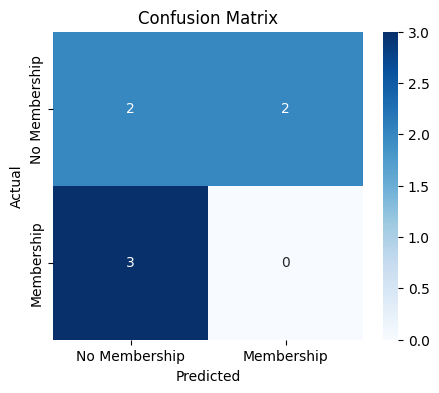

              precision    recall  f1-score   support

       False       0.40      0.50      0.44         4
        True       0.00      0.00      0.00         3

    accuracy                           0.29         7
   macro avg       0.20      0.25      0.22         7
weighted avg       0.23      0.29      0.25         7



In [25]:
# Random Forest Classification for Human Data

# Define features and independent variable
X = dfHumanPrelimForest.drop(columns=['membership_yes'])
y = dfHumanPrelimForest['membership_yes']

accuracies = []

for i in range(10):

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

  # Fit the model
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Predict the test set
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for iteration {i}: {accuracy}")

  accuracies.append(accuracy)

print(f"Mean accuracy: {np.mean(accuracies)}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Membership", "Membership"], yticklabels=["No Membership", "Membership"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))

In [26]:
# Data adjustments to synthetic data for random forest
dfSynthPrelimForest = dfSynthPrelim.copy()

dfSynthPrelimForest['Age_Group'] = dfSynthPrelimForest['Age Group'].replace({'18-20': 0, '21-23': 1, '24-26': 2, '27-30': 3})
dfSynthPrelimForest['Employment Status'] = dfSynthPrelimForest['Student Status'].replace({'Part-time student': 'Part-time', 'Student only': 'Unemployed', 'Full-time student (employed)': 'Full-time'})
dfSynthPrelimForest = dfSynthPrelimForest.drop(columns = ['Respondent ID','Year Membership Started','Alternative Stores','Comment Summary','Age Group','Student Status'])
dfSynthPrelimForest['Visit_Frequency'] = dfSynthPrelimForest['Visit Frequency'].replace({'Rarely': 0, 'Quarterly': 1, 'Monthly': 2, 'Bi-weekly': 3, 'Weekly': 4})
dfSynthPrelimForest = dfSynthPrelimForest.drop(columns = ['Visit Frequency'])
dfSynthPrelimForest = pd.get_dummies(dfSynthPrelimForest, columns=['Costco Member', 'Employment Status'])
dfSynthPrelimForest = dfSynthPrelimForest.drop(columns = ['Costco Member_No'])

/tmp/ipython-input-930961962.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSynthPrelimForest['Age_Group'] = dfSynthPrelimForest['Age Group'].replace({'18-20': 0, '21-23': 1, '24-26': 2, '27-30': 3})
/tmp/ipython-input-930961962.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dfSynthPrelimForest['Visit_Frequency'] = dfSynthPrelimForest['Visit Frequency'].replace({'Rarely': 0, 'Quarterly': 1, 'Monthly': 2, 'Bi-weekly': 3, 'Weekly': 4})


Accuracy for iteration 0: 0.888
Accuracy for iteration 1: 0.856
Accuracy for iteration 2: 0.856
Accuracy for iteration 3: 0.864
Accuracy for iteration 4: 0.872
Accuracy for iteration 5: 0.848
Accuracy for iteration 6: 0.848
Accuracy for iteration 7: 0.864
Accuracy for iteration 8: 0.848
Accuracy for iteration 9: 0.904
Mean accuracy: 0.8648


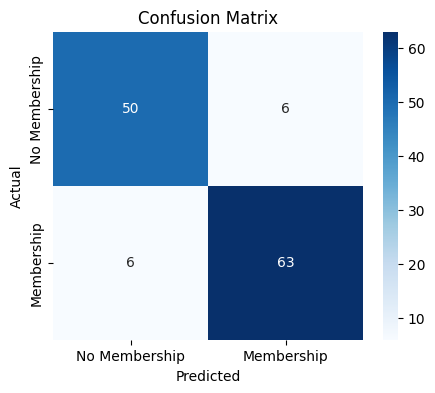

              precision    recall  f1-score   support

       False       0.89      0.89      0.89        56
        True       0.91      0.91      0.91        69

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125



In [27]:
# Random Forest Classification for Synthetic Data

# Define features and independent variable
X = dfSynthPrelimForest.drop(columns=['Costco Member_Yes'])
y = dfSynthPrelimForest['Costco Member_Yes']

accuracies = []

for i in range(10):

  # Split data
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

  # Fit the model
  model = RandomForestClassifier(n_estimators=100, random_state=42)
  model.fit(X_train, y_train)

  # Predict the test set
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy for iteration {i}: {accuracy}")

  accuracies.append(accuracy)

print(f"Mean accuracy: {np.mean(accuracies)}")

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Membership", "Membership"], yticklabels=["No Membership", "Membership"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print(classification_report(y_test, y_pred))